In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def barplot(D):
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

In [7]:
df = pd.read_csv("flights.csv")
df.columns

C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
can_del=df['CANCELLED'] | (df['DEPARTURE_DELAY']>15)

In [9]:
df['CAN_DEL']=can_del

In [10]:
df2=df[['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','SCHEDULED_TIME','CAN_DEL']]

In [11]:
df2.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CAN_DEL
0,1,1,4,AS,ANC,SEA,5,205.0,False
1,1,1,4,AA,LAX,PBI,10,280.0,False
2,1,1,4,US,SFO,CLT,20,286.0,False
3,1,1,4,AA,LAX,MIA,20,285.0,False
4,1,1,4,AS,SEA,ANC,25,235.0,False


In [12]:
len(df2)

5819079

In [13]:
sum(df2['CAN_DEL'])

1106420

In [17]:
dfopg=df2.groupby(by=['ORIGIN_AIRPORT'])
airports=dfopg.groups.keys()
dfop={op:dfopg.get_group(op) for op in airports}
airports=[op for op in airports if type(op)==str and len(op)==3 and len(dfop[op])>5000]
df3=df2[[x in airports for x in df2['ORIGIN_AIRPORT']]]
df4=df3[[x in airports for x in df3['DESTINATION_AIRPORT']]]
df5=df4[df4['SCHEDULED_TIME'].notnull()]
dfv=pd.get_dummies(df5)
dfv.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CAN_DEL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,...,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_SYR,DESTINATION_AIRPORT_TPA,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_XNA
0,1,1,4,5,205.0,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,10,280.0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,20,286.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,4,20,285.0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,25,235.0,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dfv.columns[-229]

'AIRLINE_WN'

In [23]:
dfv.columns[:20]

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'CAN_DEL', 'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL',
       'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK',
       'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN'],
      dtype='object')

In [24]:
sum(dfv['CAN_DEL'])

925031

In [29]:
xy_np=np.array(dfv)

np.random.shuffle(xy_np)

xy_npo=np.concatenate((xy_np[:,:5],xy_np[:,6:],xy_np[:,5,np.newaxis]),axis=1)

In [38]:
np.save('xyo.npy',xy_npo,allow_pickle=True)

In [5]:
xy_npo=np.load('xyo.npy',allow_pickle=True)

In [16]:
len(airports)

114

In [6]:
xy_npo.shape

(4653855, 248)

In [25]:
n=xy_npo.shape[0]

Mini Data: only time and airline, 20 columns

In [26]:
X_train=xy_npo[:round(n*0.8),:20]
y_train=xy_npo[:round(n*0.8),-1]
X_val=xy_npo[round(n*0.8):round(n*0.9),:20]
y_val=xy_npo[round(n*0.8):round(n*0.9),-1]
X_test=xy_npo[round(n*0.9):,:20]
y_test=xy_npo[round(n*0.9):,-1]

Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train, y_train)
cross_val_score(cls, X_train, y_train)

C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sk

array([0.80117467, 0.80118176, 0.80113325])

Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [34]:
y_train=[int(y) for y in y_train]

In [35]:
cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)
cross_val_score(cls, X_train, y_train)

C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.72317327, 0.72255421, 0.72327355])

3 layers NN with full data (248 columns)

In [24]:
import tensorflow as tf

In [45]:
X_train=xy_npo[:round(n*0.8),:-1]
y_train=xy_npo[:round(n*0.8),-1]
X_val=xy_npo[round(n*0.8):round(n*0.9),:-1]
y_val=xy_npo[round(n*0.8):round(n*0.9),-1]
X_test=xy_npo[round(n*0.9):,:-1]
y_test=xy_npo[round(n*0.9):,-1]

In [46]:
class Dataset(object):
    def __init__(self, X, y, batch_size, shuffle=False):
        """
        Construct a Dataset object to iterate over data X and labels y
        
        Inputs:
        - X: Numpy array of data, of any shape
        - y: Numpy array of labels, of any shape but with y.shape[0] == X.shape[0]
        - batch_size: Integer giving number of elements per minibatch
        - shuffle: (optional) Boolean, whether to shuffle the data on each epoch
        """
        assert X.shape[0] == y.shape[0], 'Got different numbers of data and labels'
        self.X, self.y = X, y
        self.batch_size, self.shuffle = batch_size, shuffle

    def __iter__(self):
        N, B = self.X.shape[0], self.batch_size
        idxs = np.arange(N)
        if self.shuffle:
            np.random.shuffle(idxs)
        return iter((self.X[i:i+B], self.y[i:i+B]) for i in range(0, N, B))


train_dset = Dataset(X_train, y_train, batch_size=64)
val_dset = Dataset(X_val, y_val, batch_size=64)
test_dset = Dataset(X_test, y_test, batch_size=64)

In [47]:
# Set up some global variables
USE_GPU = True

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models
print_every = 100
print('Using device: ', device)

Using device:  /device:GPU:0


In [56]:
def check_accuracy(sess, dset, x, scores, is_training=None):
    """
    Check accuracy on a classification model.
    
    Inputs:
    - sess: A TensorFlow Session that will be used to run the graph
    - dset: A Dataset object on which to check accuracy
    - x: A TensorFlow placeholder Tensor where input images should be fed
    - scores: A TensorFlow Tensor representing the scores output from the
      model; this is the Tensor we will ask TensorFlow to evaluate.
      
    Returns: Nothing, but prints the accuracy of the model
    """
    num_correct, num_samples = 0, 0
    for x_batch, y_batch in dset:
        feed_dict = {x: x_batch, is_training: 0}
        scores_np = sess.run(scores, feed_dict=feed_dict)
        y_pred = scores_np.argmax(axis=1)
        num_samples += x_batch.shape[0]
        num_correct += (y_pred == y_batch).sum()
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))
    acc_hist.append(acc)

In [70]:
def train(model_init_fn, optimizer_init_fn, num_epochs=1):
    """
    Inputs:
    - model_init_fn: A function that takes no parameters; when called it
      constructs the model we want to train: model = model_init_fn()
    - optimizer_init_fn: A function which takes no parameters; when called it
      constructs the Optimizer object we will use to optimize the model:
      optimizer = optimizer_init_fn()
    - num_epochs: The number of epochs to train for
    
    Returns: Nothing, but prints progress during trainingn
    """
    tf.reset_default_graph()    
    with tf.device(device):
        x = tf.placeholder(tf.float32, [None, 247])
        y = tf.placeholder(tf.int32, [None])
        
        is_training = tf.placeholder(tf.bool, name='is_training')
        scores = model_init_fn(x, is_training)
        loss = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=scores)
        loss = tf.reduce_mean(loss)

        optimizer = optimizer_init_fn()
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            train_op = optimizer.minimize(loss)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        t = 0
        for epoch in range(num_epochs):
            print('Starting epoch %d' % epoch)
            for x_np, y_np in train_dset:
                feed_dict = {x: x_np, y: y_np, is_training:1}
                loss_np, _ = sess.run([loss, train_op], feed_dict=feed_dict)
                if t % print_every == 0:
                    print('Iteration %d, loss = %.4f' % (t, loss_np))
                    loss_hist.append(loss_np)
                    check_accuracy(sess, val_dset, x, scores, is_training=is_training)
                    print()
                t += 1

In [72]:
def model_init_fn(inputs, is_training):
    input_shape = (247,)
    hidden_layer_size, num_classes = 200, 2
    initializer = tf.variance_scaling_initializer(scale=2.0)
    layers = [
        tf.layers.Flatten(input_shape=input_shape),
        tf.layers.Dense(hidden_layer_size, activation=tf.nn.relu,
                        kernel_initializer=initializer),
        tf.layers.Dense(hidden_layer_size, activation=tf.nn.relu,
                        kernel_initializer=initializer),
        tf.layers.Dense(hidden_layer_size, activation=tf.nn.relu,
                        kernel_initializer=initializer),
        tf.layers.Dense(num_classes, kernel_initializer=initializer),
    ]
    model = tf.keras.Sequential(layers)
    return model(inputs)

def optimizer_init_fn():
    return tf.train.AdamOptimizer()

loss_hist=[]
acc_hist=[]
train(model_init_fn, optimizer_init_fn)

Starting epoch 0
Iteration 0, loss = 27.4099
Got 92621 / 465386 correct (19.90%)

Iteration 100, loss = 10.2065
Got 294043 / 465386 correct (63.18%)

Iteration 200, loss = 4.5322
Got 372765 / 465386 correct (80.10%)

Iteration 300, loss = 0.4528
Got 372205 / 465386 correct (79.98%)

Iteration 400, loss = 6.3260
Got 372765 / 465386 correct (80.10%)

Iteration 500, loss = 0.8169
Got 372765 / 465386 correct (80.10%)

Iteration 600, loss = 3.2701
Got 372765 / 465386 correct (80.10%)

Iteration 700, loss = 0.6210
Got 231820 / 465386 correct (49.81%)

Iteration 800, loss = 0.5389
Got 372760 / 465386 correct (80.10%)

Iteration 900, loss = 0.9181
Got 372765 / 465386 correct (80.10%)

Iteration 1000, loss = 0.9139
Got 372765 / 465386 correct (80.10%)

Iteration 1100, loss = 0.6563
Got 372766 / 465386 correct (80.10%)

Iteration 1200, loss = 0.8951
Got 372765 / 465386 correct (80.10%)

Iteration 1300, loss = 0.6279
Got 372765 / 465386 correct (80.10%)

Iteration 1400, loss = 0.9230
Got 371995 /

KeyboardInterrupt: 

In [73]:
acc_hist

[0.1990197384536707,
 0.631826054071244,
 0.8009802615463293,
 0.799776959341278,
 0.8009802615463293,
 0.8009802615463293,
 0.8009802615463293,
 0.49812413781248255,
 0.8009695177766413,
 0.8009802615463293,
 0.8009802615463293,
 0.8009824103002668,
 0.8009802615463293,
 0.8009802615463293,
 0.7993257210143837,
 0.7033559238997306,
 0.8009802615463293,
 0.8005548082666861,
 0.7998414219594058,
 0.6239422758742206,
 0.7939559849243424,
 0.8009802615463293,
 0.8009802615463293,
 0.8009050551585136,
 0.8009716665305789,
 0.7958103595724839,
 0.8009802615463293,
 0.7990356392328088,
 0.6630410025226371,
 0.7582028681567559,
 0.8009802615463293,
 0.8008900138809505,
 0.8009802615463293,
 0.8008405925403859,
 0.8009802615463293,
 0.800892162634888,
 0.8009566252530158,
 0.8009781127923917,
 0.8009802615463293,
 0.8009802615463293,
 0.8009781127923917,
 0.8008986088967008,
 0.8005311719733726,
 0.6897349726893375,
 0.8009759640384541,
 0.8009802615463293,
 0.8009802615463293,
 0.800980261546

In [74]:
loss_hist

[27.40986,
 10.206482,
 4.5321536,
 0.45281696,
 6.32596,
 0.8168641,
 3.2701266,
 0.6210407,
 0.538918,
 0.9181453,
 0.9138785,
 0.6563049,
 0.8951365,
 0.62794495,
 0.9230031,
 0.56657684,
 0.5209099,
 0.60253805,
 0.48175508,
 0.5493343,
 0.48134893,
 0.5815608,
 0.4753269,
 0.5284742,
 0.50529975,
 0.44561037,
 0.49247932,
 0.37190777,
 0.55714333,
 0.5912371,
 0.5799558,
 0.60169196,
 0.45173034,
 0.58730865,
 0.42551786,
 0.6035611,
 0.41743016,
 0.5033471,
 0.49287638,
 0.44057798,
 0.41302714,
 0.49362493,
 0.55946165,
 0.53584474,
 0.47384626,
 0.47711283,
 0.5570768,
 0.5021292,
 0.53886914,
 0.52100515,
 0.5850009,
 0.40397236,
 0.6062422,
 0.54223615,
 0.50220245,
 0.51138115,
 0.5245211,
 0.52539706,
 0.4334491,
 0.60905516,
 0.48011366,
 0.43566763,
 0.49956203,
 0.42958534,
 0.5553153,
 0.46496066,
 0.45848435,
 0.46063238,
 0.4834111,
 0.48257968,
 0.5694178,
 0.35536575,
 0.4630409,
 0.5709847,
 0.50568223,
 0.39427093,
 0.65550876,
 0.46383682,
 0.46114886,
 0.4829543

In [75]:
len(loss_hist)

191

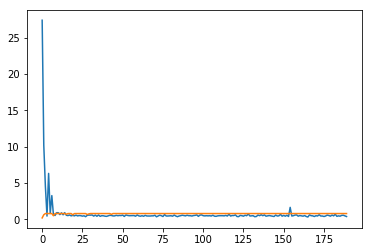

In [80]:
plt.plot(range(190),loss_hist[:-1])
plt.plot(range(190),acc_hist)

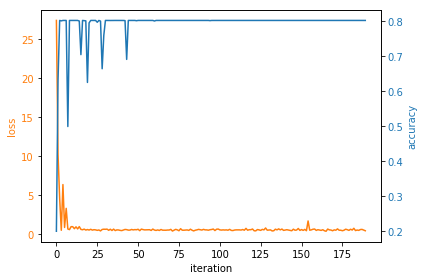

In [84]:
t = range(len(acc_hist))
data1 = loss_hist[:-1]
data2 = acc_hist

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('iteration')
ax1.set_ylabel('loss', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()